# Prediction of heart Disease using Machine Learning
> Data : 303 patients data of 14 medical parameters taken to predict whether a patient has heart disease or not


In [76]:
# import all necessary tools

# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modellling libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV , GridSearchCV

# Metrics 
from sklearn.metrics import precision_score , accuracy_score , f1_score , confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [4]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [5]:
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [6]:
# Import data
df = pd.read_csv("Data/heart-disease.csv")
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration
Before modelling we can do some data exploration to know more about the data

### How many people have heart disease ?

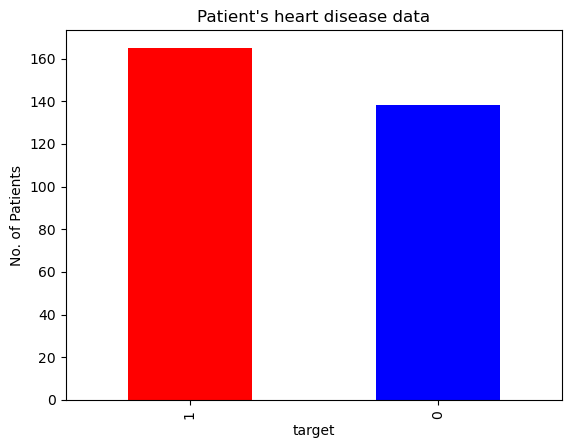

In [8]:
df["target"].value_counts().plot(kind="bar",
                                 color=["red","blue"], 
                                 ylabel ="No. of Patients",
                                title="Patient's heart disease data");

In [9]:
#Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Check few statistics of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
## Heart disease according to Sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Gender and Heart Disease

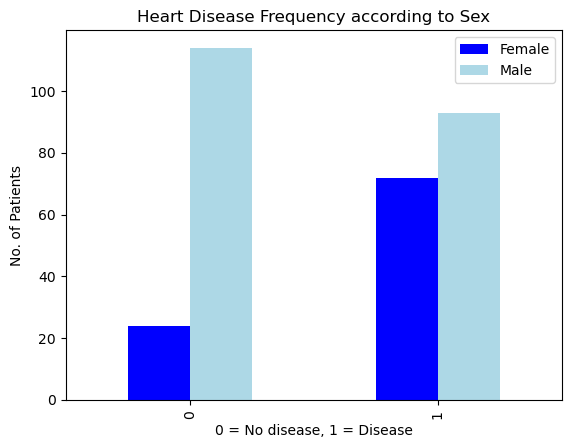

In [12]:
# create the plot of cross tab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  color=["blue","lightblue"],
                                  );
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("No. of Patients")
plt.legend(["Female","Male"]);

### Trend of Age and Max Heart Rate

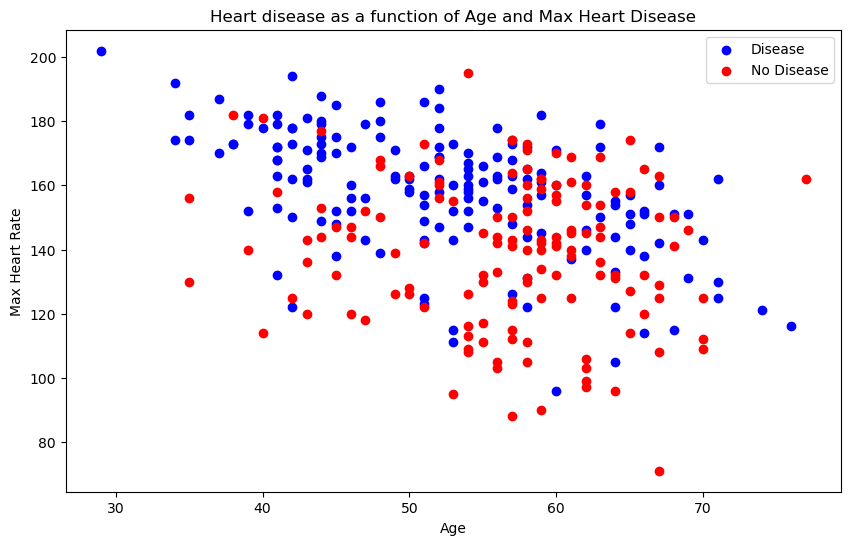

In [13]:
 # Age vs Max Heart rate for heart disease
plt.figure(figsize=(10,6))

# scatter with postive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="b")
# scatter with negetaive example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="r");

# Adding information
plt.title("Heart disease as a function of Age and Max Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

### Spread of Age of Patients

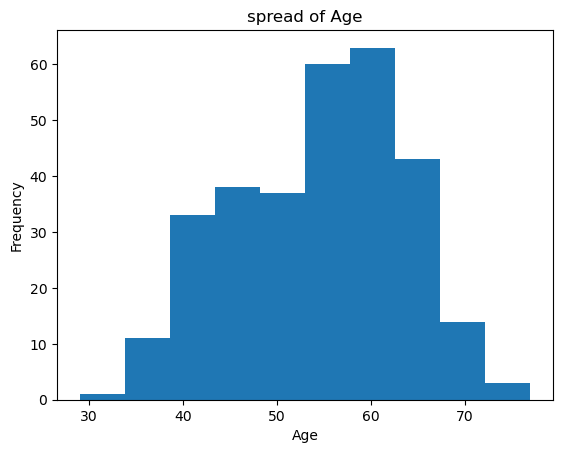

In [14]:
# Checking the spread of the age with a histogram
df.age.plot.hist()
plt.xlabel("Age")
plt.title("spread of Age");

In [15]:
# Heart Disease Frequency as per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### Relationship between chest pain type and Heart Disease

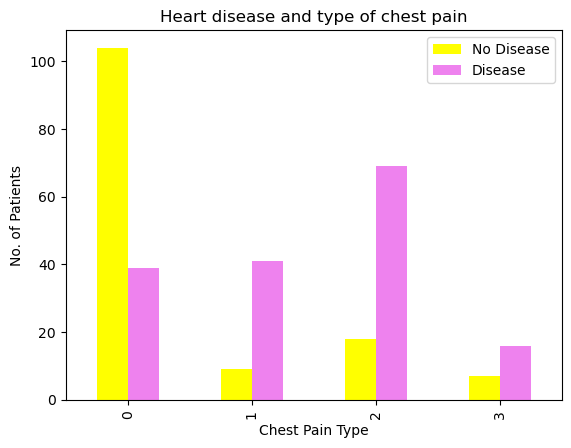

In [16]:
# visualizing the above cross tab
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 color=["yellow","violet"])
plt.title("Heart disease and type of chest pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("No. of Patients")
plt.legend(["No Disease","Disease"]);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Corellation of each medical parameters with the disease

In [18]:
# Finding the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


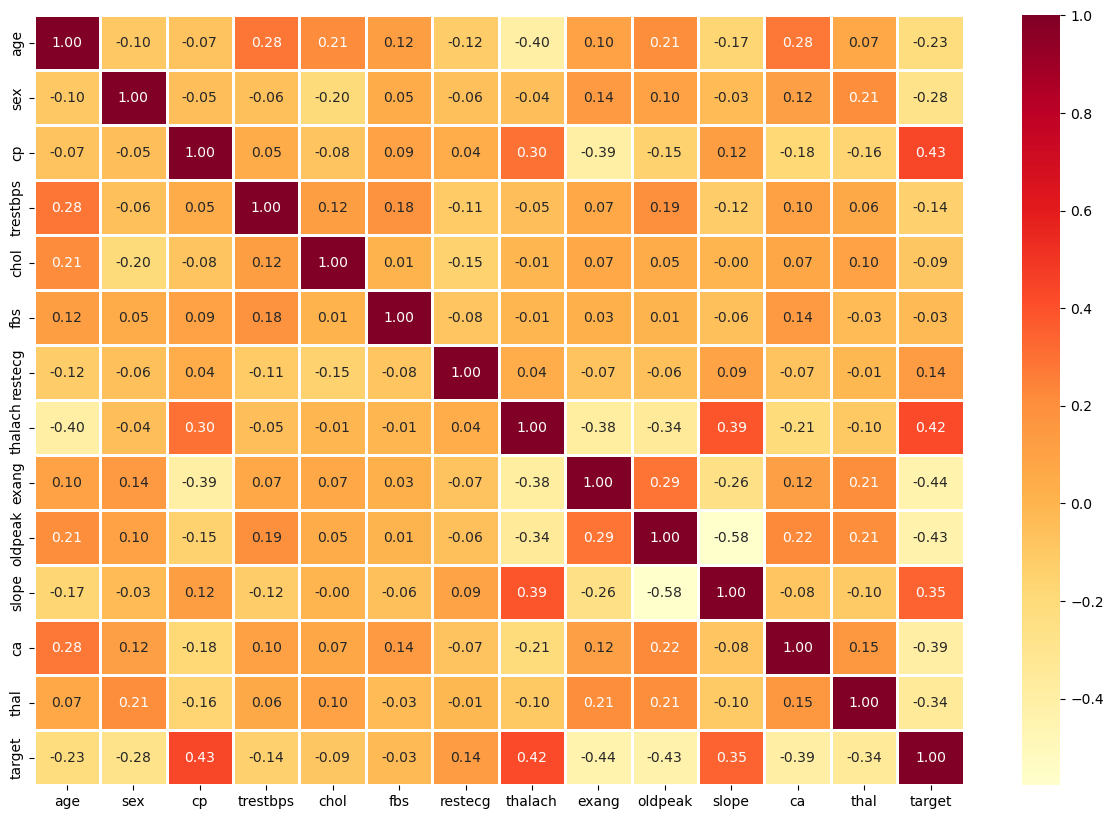

In [19]:
# Plotting Heat map of correlation matrix using Seaborn
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,         # annotation true to include necessary info
                linewidths=0.8,
                fmt=".2f",
                cmap="YlOrRd");       # fmt = .2f : to format values to 2 deci places

# Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# splitting data into X and y
X = df.drop("target",axis=1)
y= df["target"]

# training and testing sets
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

Now the data is ready for modelling

Using scikit learn machine learning map we can have a guidance of which model to choose for modelling.

models to use:

> Logistic Regression |  Random Forest Classifier  |  K Neighbours Classifier

In [22]:
# Putting models together:
models = {"Logistic Regression":LogisticRegression(),
         "Random Forest": RandomForestClassifier(),
         "KNN": KNeighborsClassifier()}

# Creating a function to fit and score models
def fit_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Scores machine learning models saved in the models dictionary
    """
    # setting up seed
    np.random.seed(42)
    # Dictionary for model Scores
    model_scores={}
    # looping in models
    for name, model in models.items():
        model.fit(X_train,y_train)
        # Evaluate the model and append score to the dict
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [23]:
# Using the function created above to check the baseline performance
model_scores = fit_score(models=models,
          X_train=X_train,
          X_test=X_test,
          y_train=y_train,
          y_test=y_test)
model_scores

C:\Users\Dell\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

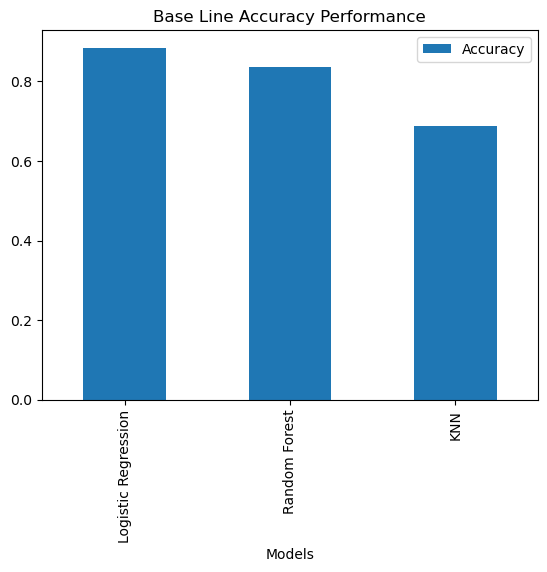

In [24]:
# Visualising the baseline model comparison
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.title("Base Line Accuracy Performance")
plt.xlabel("Models");

now lets tune this baseline model to improve model's performance as well as robustness

further steps:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve

# Hyperparameter Tuning

Baseline KNN performed pretty badly compared to others lets try to tune it first

In [25]:
train_scores = []
test_scores = []
# Lets adjust the number of neighbors, default is 5
neighbors = range(1,21)

# KNN insatance
knn = KNeighborsClassifier()

# Loop for different neighbors
for i in neighbors :
    knn.set_params(n_neighbors=i)
    # Fitting the model to training data
    knn.fit(X_train,y_train)
    # finding training score and adding it to the list
    train_scores.append(knn.score(X_train,y_train))
    #Adding test scores to the list
    test_scores.append(knn.score(X_test,y_test))

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum test score on the test data is 75.41 % /n Still far below other models


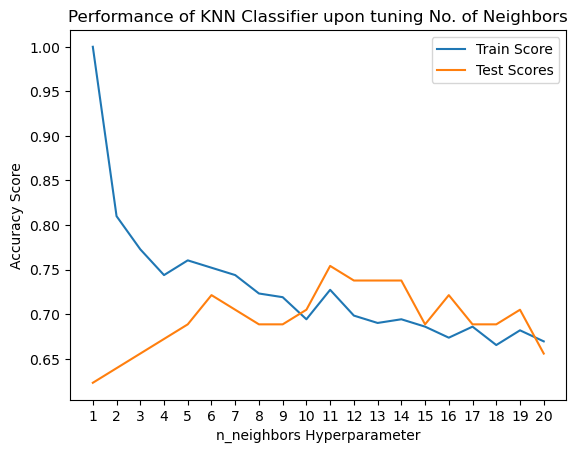

In [39]:
# Visualizing the training and test scores
plt.plot(neighbors,train_scores,label= "Train Score")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.legend()
plt.xticks(np.arange(1,21,1)) # ticks on x axis arange(start,stop+1,step)
plt.xlabel("n_neighbors Hyperparameter")
plt.ylabel("Accuracy Score")
plt.title("Performance of KNN Classifier upon tuning No. of Neighbors");

print(f"Maximum test score on the test data is {max(test_scores)*100 :.2f} % ")

## Tuning using RandomizedSearchCV
tuning 
* LogisticRegression
* RandomForestClassifier

In [48]:
# Hyper param grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Hyper param grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [41]:
# Tune Logistic Regression
np.random.seed(42)

# setup random search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions =log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit Logistic Regression with Randomized paramters to the training data
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
# Checking best Parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
rs_log_reg.score(X_test,y_test)
# so no improvement over the base line Logistic Regression Model

0.8852459016393442

Now that we have tuned Logistic Regression, lets tune Random Forest Classifier

In [49]:
# Setup Random Seed
np.random.seed(42)

#Create random forest classifier with randomized parameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit Random forest classifer with randomized hyper parameters
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
# Best Parameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [52]:
# Lets check the score over test data
rs_rf.score(X_test,y_test)

# So this model has improved a little compared to the baseline Random Forest model
# This can be improved further using more combinations

0.8688524590163934

## Tuning using GridSearchCV
till here baseline logistic regression is still better 

In [53]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}
# setup grid search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)

# fit this above model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
# Checking best hyper param
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Score of tuned logistic regression
gs_log_reg.score(X_test,y_test)

# So this tuned model is performing exactly same as the baseline model.

0.8852459016393442

# Evaluation of Tuned ML Classifier 
* ROC curve and AUC
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1 score

we compare true labels with the predicted labels.

In [57]:
# Making predictions
y_preds = gs_log_reg.predict(X_test)

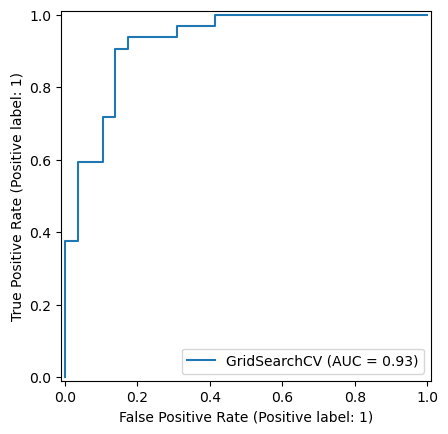

In [63]:
# ROC curve and a AUC score
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [64]:
# Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

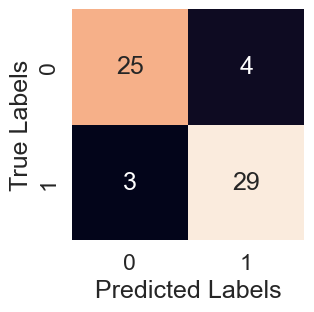

In [68]:
# Visualizing Confusion Matrix
sns.set(font_scale=1.5)

# Creating a function to plot Confusion Matrix
def plot_conf_mat(y_test,y_preds):
    """
    Plotting Confusion Matrix using seaborn's heatmap
    """
    fig, ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot= True,
                    cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plot_conf_mat(y_test,y_preds)

In [69]:
# Classification Report
print(classification_report(y_test,y_preds))
# the classification report we get here is only on one set of the splitted data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### finding cross validated evaluation metrics using cross_val_score
 

In [70]:
# Creating the logistic regression model isntance with best params

# Check best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# New classifier instance
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [77]:
# Cross Validated Accuracy ( We can use all X and y data as we are using cv)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

0.8446994535519124

In [80]:
# Cross Validated Precision
cv_preci = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_preci.mean()

0.8207936507936507

In [81]:
# Cross Validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall.mean()

0.9212121212121213

In [83]:
# Cross Validated F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1.mean()

0.8673007976269721

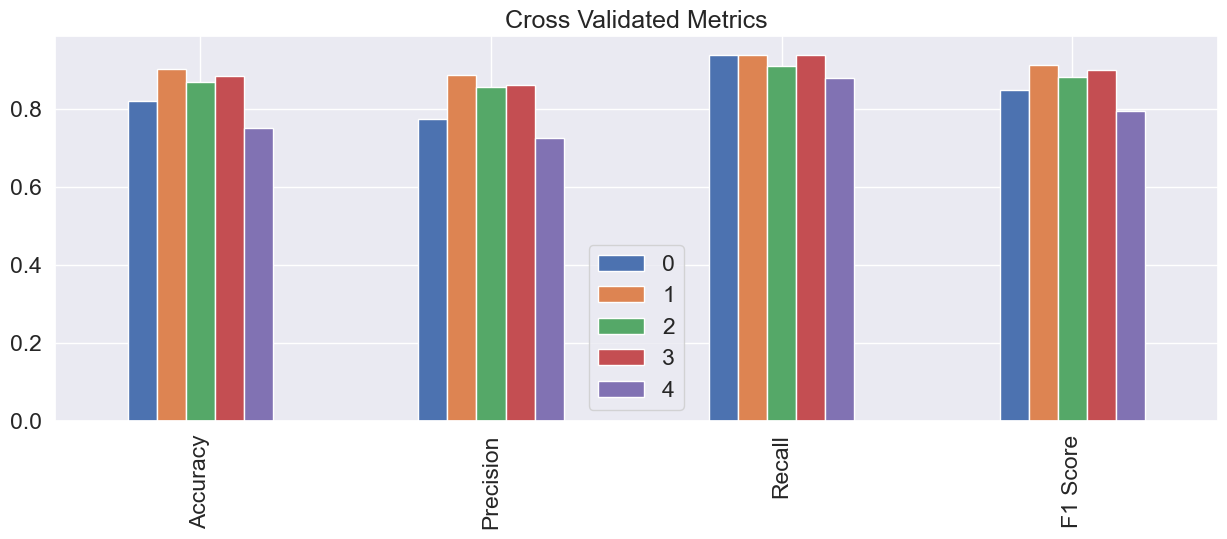

In [95]:
# Visualise cross validated metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_preci,
                          "Recall":cv_recall,
                          "F1 Score":cv_f1},
                         )

cv_metrics.T.plot.bar(title="Cross Validated Metrics",
                     figsize=(15,5));

## Feature Importance:
Which features contributed most to the outcomes of the model, and how?

finding feature importance is different for each model

In [97]:
# fit an instance of logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [99]:
# Check coef_ :  this tells us which parameter contributes to the labels by howmuch 
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [100]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

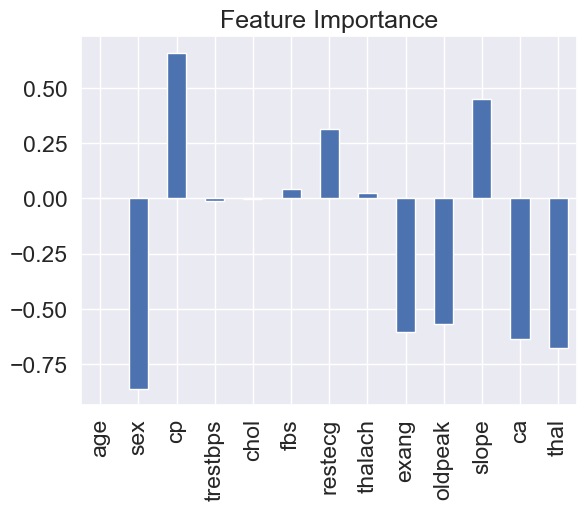

In [107]:
# Visualise Feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);
